Jonathan Bunch

3 October 2021

Bellevue University

DSC550-T301

# Case Study:  Testing  Hypothesis

Hypothesis:  Articles about Climate Change are more likely to be published by "Liberal" sources

### Step 1: Load data into a dataframe

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import re

# Import data
articles = pd.read_csv("articles1.csv")

### Step 2:  check the dimension of the table/look at the data

In [58]:
# Print the shape parameter of the dataframe.
print("The dimensions of the table are: ", articles.shape)

The dimensions of the table are:  (50000, 10)


In [59]:
# Display the first few rows of the dataframe.
articles.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


In [60]:
# Display some basic descriptive statistics for the dataframe.
articles.describe()

,Unnamed: 0,id,year,month,url
count,50000.000000,50000.000000,50000.000000,50000.000000,0.0
mean,25694.378380,44432.454800,2016.273700,5.508940,NaN
std,15350.143677,15773.615179,0.634694,3.333062,NaN
min,0.000000,17283.000000,2011.000000,1.000000,NaN
25%,12500.750000,31236.750000,2016.000000,3.000000,NaN
50%,25004.500000,43757.500000,2016.000000,5.000000,NaN
75%,38630.250000,57479.250000,2017.000000,8.000000,NaN
max,53291.000000,73469.000000,2017.000000,12.000000,NaN


In [61]:
# Display the data types and non-null value counts for each column.
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   50000 non-null  int64  
 1   id           50000 non-null  int64  
 2   title        50000 non-null  object 
 3   publication  50000 non-null  object 
 4   author       43694 non-null  object 
 5   date         50000 non-null  object 
 6   year         50000 non-null  float64
 7   month        50000 non-null  float64
 8   url          0 non-null      float64
 9   content      50000 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 3.8+ MB


In [62]:
# These methods can also be applied to individual columns.
#display min, max of years published
articles.year.describe()

count    50000.000000
mean      2016.273700
std          0.634694
min       2011.000000
25%       2016.000000
50%       2016.000000
75%       2017.000000
max       2017.000000
Name: year, dtype: float64

In [65]:
#display length of data
# We have seen this value in several of the previous steps, but we can also display it explicitly.
print("Length of the dataframe: ", len(articles), "\n")

#display publishers (publications)
# The unique() method returns all of the unique values in the column.
print("Unique values for publisher: ", articles.publication.unique(), "\n")

#display how many articles from each year
# The value_counts() method returns a count of each unique value for the specified column.
print("Article counts for each year:")
print(articles.year.value_counts())


Length of the dataframe:  50000 

Unique values for publisher:  ['New York Times' 'Breitbart' 'CNN' 'Business Insider' 'Atlantic'] 

Article counts for each year:
2016.0    28451
2017.0    17908
2015.0     3326
2013.0      212
2014.0       76
2012.0       26
2011.0        1
Name: year, dtype: int64


### Step 3:  Create some bar charts to show articles

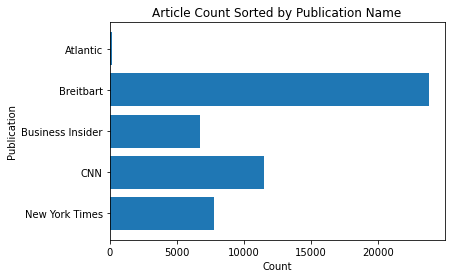

In [66]:
#display bar chart of articles sorted by Publication Name
# I decided to use a horizontal bar plot since the publisher names are fairly long.
# Use the sorted value index for the y axis. I used ascending=False to display it in the desired direction.
y = articles.publication.value_counts().sort_index(ascending=False).index
# Use the matching count values for the x axis.
x = articles.publication.value_counts().sort_index(ascending=False).values
# Create and label the plot
plt.barh(y=y, width=x)
plt.title("Article Count Sorted by Publication Name")
plt.xlabel("Count")
plt.ylabel("Publication")
plt.show()

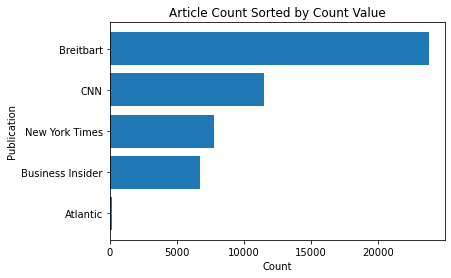

In [67]:
#display bar chart of articles sorted by counts
# Use the sorted value index for the y axis.
y = articles.publication.value_counts(ascending=True).index
# Use the matching count values for the x axis.
x = articles.publication.value_counts(ascending=True).values
# Create and label the plot
plt.barh(y=y, width=x)
plt.title("Article Count Sorted by Count Value")
plt.xlabel("Count")
plt.ylabel("Publication")
plt.show()

### Step 4:  clean text:  no punctuation/all lowercase

In [68]:
# Define the text cleaning function.
def clean_text(article):
    clean1 = re.sub(r'['+string.punctuation + '’—”'+']', "", article.lower())
    return re.sub(r'\W+', ' ', clean1)

# Create a new column with the cleaned text.
articles['clean_content'] = articles['content'].apply(clean_text)
articles.clean_content.head()

0    washington congressional republicans have a ne...
1    after the bullet shells get counted the blood ...
2    when walt disneys bambi opened in 1942 critics...
3    death may be the great equalizer but it isnt n...
4    seoul south korea north koreas leader kim said...
Name: clean_content, dtype: object

In [69]:
#look at mean, min, max article lengths
# Create a function to split the content into words and count them.
def word_count(content):
    cs = content.split()
    return len(cs)

# Create a new column for the word count.
articles['word_count'] = articles['clean_content'].apply(word_count)
articles.word_count.head()

0     876
1    4743
2    2350
3    2104
4     690
Name: word_count, dtype: int64

In [70]:
#look at mean, min, max article lengths
articles.word_count.describe()

count    50000.000000
mean       636.260460
std        644.856619
min          0.000000
25%        275.000000
50%        468.000000
75%        832.000000
max      24736.000000
Name: word_count, dtype: float64

### Step 5:  remove articles with no words

In [73]:
# First, lets see how many articles have a word count of zero.
print(len(articles[articles['word_count'] == 0]))
# Filter the dataframe to keep only observations with a word count greater than zero.
articles = articles[articles['word_count'] > 0]
# Display the new descriptives for the filtered dataframe.
articles.word_count.describe()

0


count    49935.000000
mean       637.088675
std        644.867203
min          1.000000
25%        276.000000
50%        469.000000
75%        833.000000
max      24736.000000
Name: word_count, dtype: float64

### Step 6:  Check for Outliers:  show bar graph of outliers

Text(0, 0.5, 'Frequency')

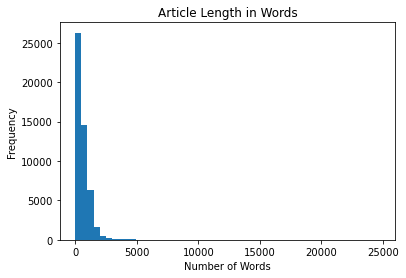

In [85]:
plt.hist(x=articles.word_count, bins=50)
plt.title("Article Length in Words")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")